# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

In [5]:
! git clone https://github.com/ds4e/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [6]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/college_completion.csv")

# Check the dimensions of the data
print("Data Dimensions:", df.shape)

# Display the first few rows
print(df.head())

# Display column names and data types
print(df.info())


Data Dimensions: (3798, 63)
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  N

2. For the dimension the dataset has 3798 rows and 63 columns. There are 3798 observastions which are the institutions. There are 63 variables which include: level, control, aid_value, grad_100_value, and more.

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


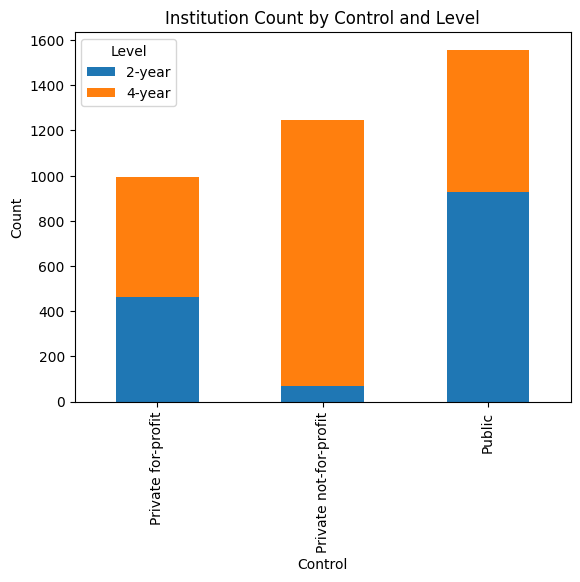

In [7]:
#3
cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)

# Plot the crosstab
cross_tab.plot(kind="bar", stacked=True)
plt.title("Institution Count by Control and Level")
plt.xlabel("Control")
plt.ylabel("Count")
plt.legend(title="Level")
plt.show()


3. some insights from the crosstabulation are: Public institutions dominate the 2-year college sector, primarily community colleges.
Private not-for-profits are heavily concentrated in 4-year institutions, which aligns with the traditional private college/university model.
For-profit institutions have a mix of both 2-year and 4-year programs, likely reflecting career-oriented education models.

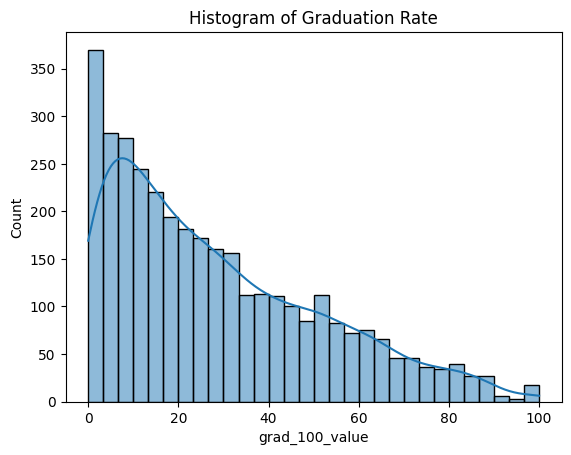

<ipython-input-9-f812aa529734>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['grad_100_value'], shade=True)


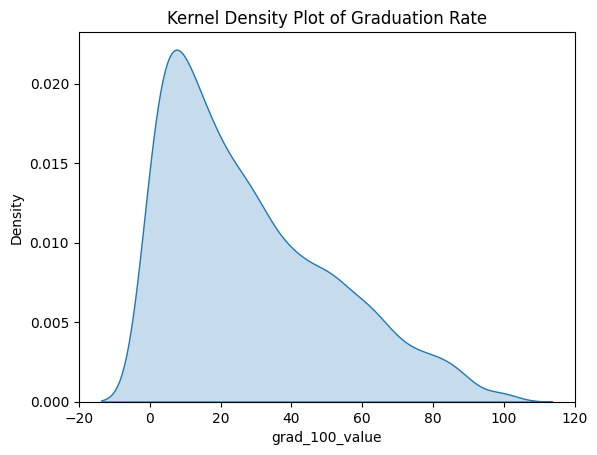

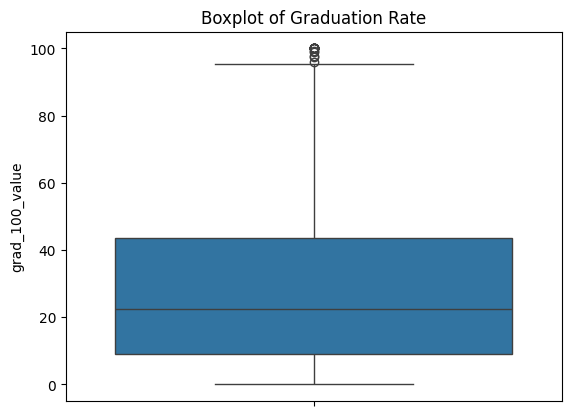

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [9]:
#4
# Histogram
sns.histplot(df['grad_100_value'], bins=30, kde=True)
plt.title("Histogram of Graduation Rate")
plt.show()

# Kernel Density Plot
sns.kdeplot(df['grad_100_value'], shade=True)
plt.title("Kernel Density Plot of Graduation Rate")
plt.show()

# Boxplot
sns.boxplot(y=df['grad_100_value'])
plt.title("Boxplot of Graduation Rate")
plt.show()

# Summary Statistics
print(df['grad_100_value'].describe())


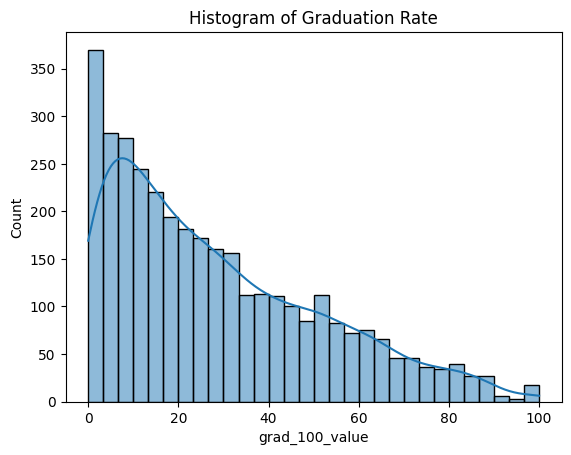

<ipython-input-12-1daf6e51fece>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['grad_100_value'], shade=True)


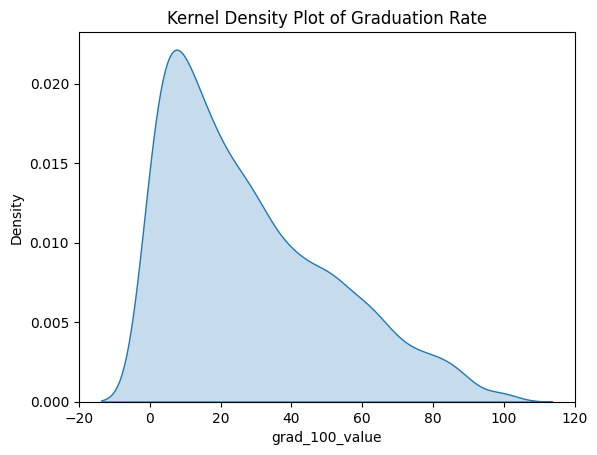

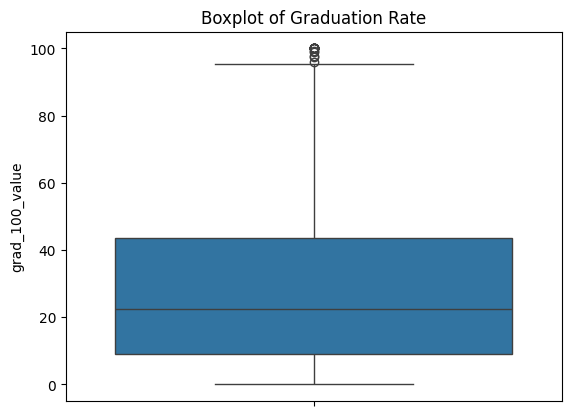

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [12]:
# Histogram
sns.histplot(df['grad_100_value'], bins=30, kde=True)
plt.title("Histogram of Graduation Rate")
plt.show()

# Kernel Density Plot
sns.kdeplot(df['grad_100_value'], shade=True)
plt.title("Kernel Density Plot of Graduation Rate")
plt.show()

# Boxplot
sns.boxplot(y=df['grad_100_value'])
plt.title("Boxplot of Graduation Rate")
plt.show()

# Summary Statistics
print(df['grad_100_value'].describe())


5. The Kernal Density plot shows:
The distribution is right skewed, meaning there are more institutions with lower graduation rates than institutions with higher graduation rates. The peak of the distribution is around 10, indicating that a large number of institutions have graduation rates around that value.
The Boxplot shows: The median is around 22.5, indicating that half of the institutions have graduation rates below this value, and half have graduation rates above it. The interquartile range (IQR), which represents the middle 50% of the data, spans from around 9 to 43.65. There are outliers above 90, indicating some institutions have exceptionally high graduation rates.

<ipython-input-13-dc6913b0e7d1>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="grad_100_value", hue="levelXcontrol", shade=True)


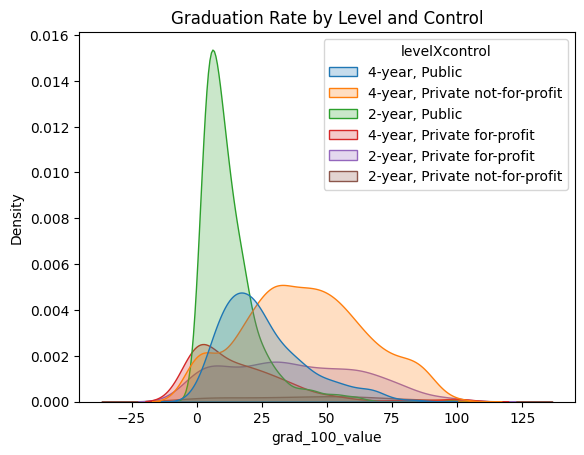

In [13]:
#6
df['levelXcontrol'] = df['level'] + ', ' + df['control']

# KDE Plot for Interaction Variable
sns.kdeplot(data=df, x="grad_100_value", hue="levelXcontrol", shade=True)
plt.title("Graduation Rate by Level and Control")
plt.show()


6. Private not-for-profit 4-year institutions appear to have the best graduation rates on average compared to the other groups.

<ipython-input-14-3cdc5930eda9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['aid_value'], shade=True)


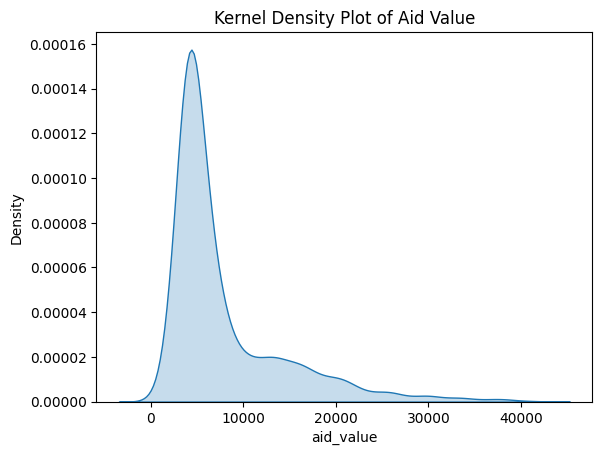

<ipython-input-14-3cdc5930eda9>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="aid_value", hue="levelXcontrol", shade=True)


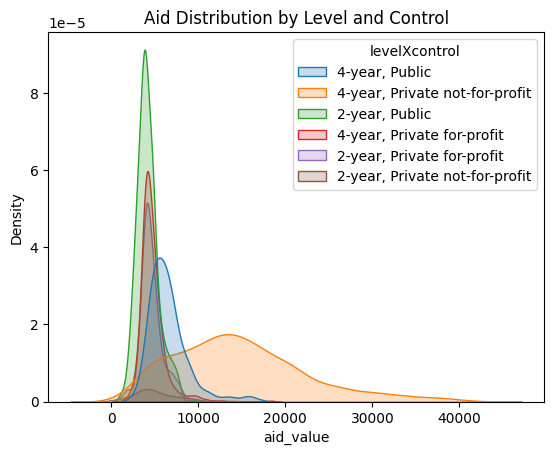

                                 count          mean          std     min  \
levelXcontrol                                                               
2-year, Private for-profit       464.0   4559.681034  1286.688269   294.0   
2-year, Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
2-year, Public                   926.0   4126.199784  1260.271382   881.0   
4-year, Private for-profit       527.0   4696.062619  1489.410020  1580.0   
4-year, Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
4-year, Public                   632.0   6514.071203  2353.716693  2232.0   

                                    25%      50%       75%      max  
levelXcontrol                                                        
2-year, Private for-profit      3818.75   4286.5   5122.00   9727.0  
2-year, Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
2-year, Public                  3311.25   3943.5   4762.00   9809.0  
4-year, Private for-profit      3

In [14]:
#7
sns.kdeplot(df['aid_value'], shade=True)
plt.title("Kernel Density Plot of Aid Value")
plt.show()

# Grouped KDE Plot
sns.kdeplot(data=df, x="aid_value", hue="levelXcontrol", shade=True)
plt.title("Aid Distribution by Level and Control")
plt.show()

# Grouped Descriptive Statistics
print(df.groupby('levelXcontrol')['aid_value'].describe())


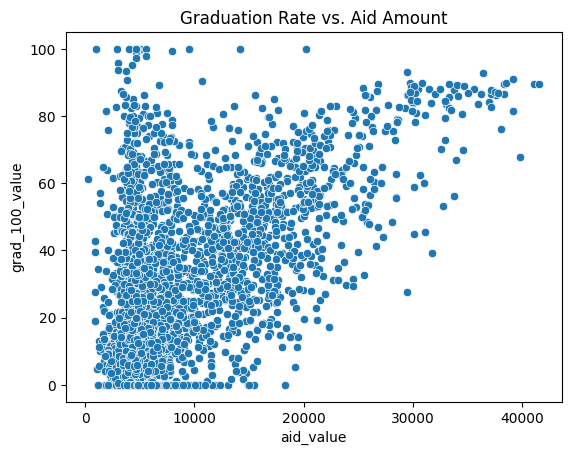

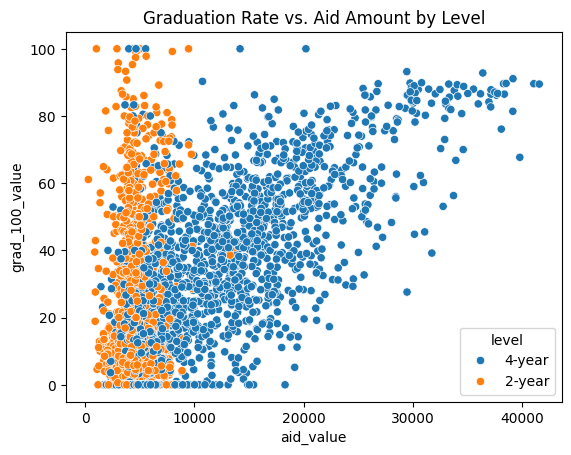

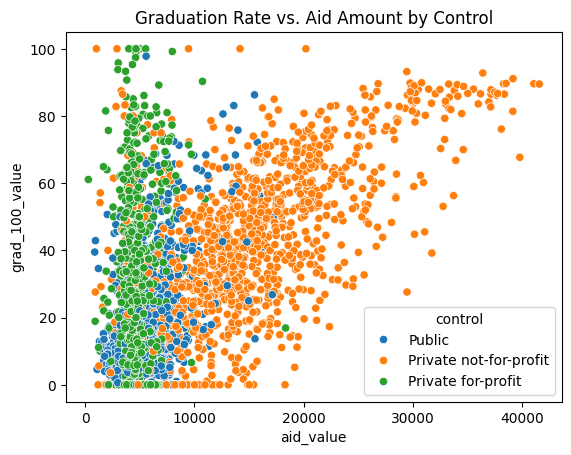

In [15]:
# Simple Scatterplot
sns.scatterplot(data=df, x="aid_value", y="grad_100_value")
plt.title("Graduation Rate vs. Aid Amount")
plt.show()

# Grouped by Level
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="level")
plt.title("Graduation Rate vs. Aid Amount by Level")
plt.show()

# Grouped by Control
sns.scatterplot(data=df, x="aid_value", y="grad_100_value", hue="control")
plt.title("Graduation Rate vs. Aid Amount by Control")
plt.show()


8. Aid appears to be most positively associated with graduation rates for private not-for-profit institutions. In contrast, for-profit institutions seem to have lower graduation rates despite aid, and public institutions have mixed results.









**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.